In [91]:
from sympy import * 
from sympy.abc import * 
init_printing()

In [92]:
C_1, C_2, K_2, I_1, I_2, Y_1, Y_2, K_1 = symbols('C_1, C_2, K_2, I_1, I_2, Y_1, Y_2, K_1 ', positive=True)
alpha, beta = symbols('alpha, beta', positive=True)
eta = Symbol('eta', positive=True)

## Долговой навес и потолок долга

#### Выписать равенства

\begin{align*}
D \rightarrow \infty \quad \text{унаследованный долг очень большой}\\
U(C_1, C_2) = \sqrt{C_1} + \beta \cdot \sqrt{C_2} \\
Y_1 \rightarrow \text{доход в первом периоде, заданный экзогенно} \\
K_2 = I_1 \\
Y_2 = K_2^{\alpha} = I_1^{\alpha} \\
\eta \cdot  Y_2 \rightarrow \text{максимальная сумма выплат по долгу} \quad \eta < 1 
\end{align*}	
\begin{align*}
\begin{cases}
C_1 = Y_1 - I_1 \\
C_2=  Y_2 \cdot (1 - \eta) = I_1^{\alpha} (1 - \eta) 
\end{cases} 
\end{align*}

In [93]:
constraints = {
    C_1: Y_1 - I_1,
    C_2: I_1 ** alpha * (1 - eta)
}

helper = {
    Y_1: C_1 + I_1,
}
constraints

#### Пункт (a)



In [94]:
U = sqrt(C_1) + beta * sqrt(C_2)
Eq(Symbol('U'), U)

In [95]:
U = U.subs(constraints)
Eq(Symbol('U'), U)

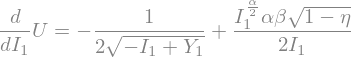

In [96]:
Eq(Derivative(Symbol('U'), I_1), diff(U, I_1))

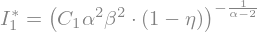

In [97]:
I_opt = solve(diff(U, I_1).subs(helper), I_1)[0]
Eq(Symbol("I_1^*"), I_opt)

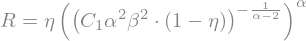

In [98]:
Eq(R, eta * I_opt ** alpha)

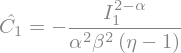

In [99]:
Eq(Symbol("\hat{C_1}"), solve(I_opt - I_1, C_1)[0])

#### Пункт (b)

Теперь мы определяем как менять именно потребление в первом периоде. 


In [100]:
U = sqrt(C_1) + beta * sqrt(C_2)
helper = {
    I_1: Y_1 - C_1,
    Y_1: C_1 + I_1
}
U = U.subs(C_2, constraints.get(C_2)).subs(I_1, helper.get(I_1))
Eq(Symbol('U'), U)

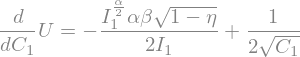

In [101]:
Eq(
    Derivative(Symbol('U'), C_1), 
    diff(U, C_1).subs(helper)
)

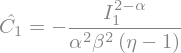

In [102]:
C_1_opt = solve(
    diff(U, C_1).subs(helper),
    C_1
)[0]
Eq(Symbol("\hat{C_1}"), C_1_opt)

## Решение проблемы динамической несогласованности 

\begin{align}
y_t = \bar{y} + b \cdot ( \pi_t - \pi_t^e) \quad b > 0 \\
W_{pol} = \sum_{t=0}^\infty \beta^t (y_t - \frac{1}{2} \cdot a \cdot pi_t^2) \quad a > 0 \quad |\beta| < 1 \\
\pi_{t+1}^e = \begin{cases}
\hat \pi & \pi_t = \hat \pi \\
\frac{b}{a} & \pi_t \ne \hat \pi \\
\end{cases}
\end{align}

### Пункт (а)

In [103]:
yhat = Symbol('\hat y')
y_t = Symbol('y_t')
pi_t = Symbol('pi_t')
pi_t_e = Symbol('pi_t_e')
alpha = Symbol('alpha', positive=True)
constraints = {
    y_t: yhat + b * (pi_t - pi_t_e),
    pi_t_e: b / a 
}

In [104]:
W_pol_t = beta ** t * (y_t - 1 / 2 * alpha * pi_t ** 2)
Eq(Symbol("W_{pol}^t"), W_pol_t)

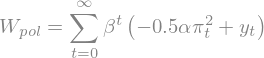

In [105]:
total = Sum(W_pol_t, (t, 0, oo))
Eq(Symbol("W_{pol}"), total)

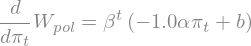

In [106]:
Eq(
    Derivative(Symbol("W_{pol}"), pi_t), 
    diff(total.subs(constraints), pi_t).args[0]
)

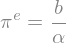

In [107]:
pi_opt = solve(diff(total.subs(constraints), pi_t).args[0], pi_t)[0]
Eq(Symbol("pi^e"), pi_opt)

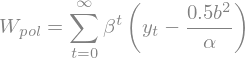

In [108]:
Eq(Symbol("W_{pol}"), total.subs(pi_t, pi_opt))

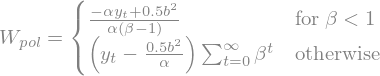

In [109]:
# извлечение общего решения для любых значений бета 
expr = total.subs(pi_t, pi_opt).doit().simplify()
Eq(Symbol("W_{pol}"), expr)

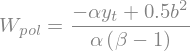

In [110]:
# взять бету в нужном интервале 
Eq(Symbol("W_pol"), expr.args[0].args[0])

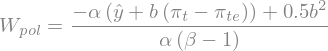

In [111]:
Eq(
    Symbol("W_pol"), 
    expr.args[0].args[0].subs(
        y_t, constraints.get(y_t)
    ).simplify()
)

### Пункт (b)

In [112]:
constraints = {
    y_t: yhat + b * (pi_t - pi_t_e),
    pi_t_e: Symbol("\hat{\pi}"),
    pi_t: Symbol("\hat{\pi}")
}
Eq(Symbol("pi^e_t"), constraints.get(pi_t_e))

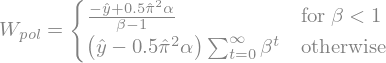

In [113]:
new_opt = total.doit().simplify().subs(constraints).subs(constraints)
Eq(Symbol("W_{pol}"),
    new_opt
)

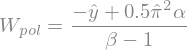

In [114]:
Eq(Symbol("W_{pol}"),
   new_opt.args[0].args[0]
)

## Неприятная монетаристская арифметика (реально неприятная)

In [209]:
M_T, M_prev, B_T, B_prev, P_T, t_T, i_prev, g_T, P_prev = symbols(
'M_T, M_{T-1}, B_T, B_{T-1}, P_T, t_T, i_{T-1}, g_T, P_{T-1}'
)
M_t, B_t, P_t, t_t, g_t = M_T, B_T, P_T, t_T, g_T
left_bc = M_t - M_prev + B_t + P_t * t_t
right_bc = (1 + i_prev) * B_prev + P_t * g_t
Eq(left_bc, right_bc)

In [210]:
values = {
    i_prev:0.1,
    B_prev:10, 
    P_prev:1,
    M_prev:10.5,
    B_T:0
}

#### Неприятный пункт (а). А в питоне очень даже приятный.

<ul>
<li> Задачи монетарных властей
    
Собственно, выбрать инфляцию, формула которой такая:
\begin{align}
\pi_T = \frac{P_T - P_{t-1}}{P_{t-1}}
\end{align}

<li> Задачи фискальных властей
    
Собственно, обеспечить уровень профицита/дефицита бюджета на каком-то уровне:
    
\begin{align}
t_T - g_T = \text{target}
\end{align}
    
<li> Наша задача
    
Найти реальный доход от сеньоража
    
\begin{align}
S = \frac{M_T - M_{T-1}}{P_T}
\end{align}

In [211]:
pi_T = (P_T - P_prev) / P_prev 
budget_surplus = t_T - g_T
target_pi_T = Symbol('\hat{\pi_T}')
target_budget = Symbol('\hat{budget}')

base_equations = Matrix([
    left_bc - right_bc, 
    pi_T - target_pi_T, 
    budget_surplus - target_budget, 
    S - (M_T - M_prev) / P_T
])

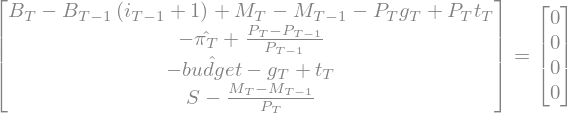

In [214]:
targets = {
    target_pi_T: 0.05, 
    target_budget: 8
}
equations = base_equations.copy()
Eq(base_equations, Matrix([0, 0, 0, 0]))

In [215]:
solution = solve(
    equations.subs(values).subs(targets)
)[0]
solution

In [216]:
Eq(S, solution.get(S))

### Неприятный пункт (б)

Теперь и далее.
\begin{align}
M_T = M_{T-1}
\end{align}

Это наше новое уравнение, которое мы запишем в систему.

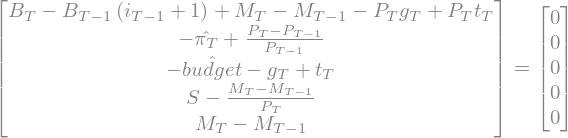

In [219]:
targets = {
    target_pi_T: 0.05, 
}

equations = Matrix.vstack(
    base_equations, 
    Matrix([M_T - M_prev])                     )

Eq(equations, Matrix([0, 0, 0, 0, 0]))

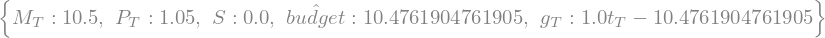

In [220]:
solution = solve(
    equations.subs(values).subs(targets),
)[0]
solution

In [221]:
Eq(target_budget, solution.get(target_budget))

### Неприятный пункт C

Монетарные власти перестают таргетить инфляцию, но поддерживают денежную массу на постоянном уровне

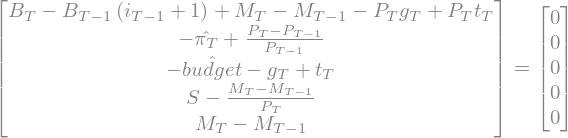

In [223]:
targets = {
    target_budget: 8
}

Eq(equations, Matrix([0, 0, 0, 0, 0]))

In [224]:
solution = solve(
    equations.subs(values).subs(targets),
)[0]
solution

In [225]:
Eq(target_pi_T, solution.get(target_pi_T))